# Leibniz Rule for Integrals
A quick derivation of the [Leibniz Rule for Integrals](https://en.wikipedia.org/wiki/Leibniz_integral_rule#Proof_of_basic_form). 

### Derivation
We can start with an integral:

$$I(x, t) = \int_{a(x)}^{b(x)} f(x,t)dx$$

### Derivation 2
We can start with a function of $t$ and $x$, $f$, and we are going to integrate that function with respect to $x$ from the limits $a$ to $b$, and then take the results derivative with respect to $t$:

$$\frac{d}{dt} \Big( \int_a^b f(t, x) dx\Big)$$

To orient ourselves, let's quickly think about what our function represents and what is going on here. For a moment let us define $f(t, x)$ as:

$$f(t, x) = t + x^3 - 3x^2 + 2x$$

We see that it is a function of two variables, which can be viewed as two dimensional cross sections (where below, on the left we are looking at different $f(x,t)$ curves for fixed values of $t$, on the right we are looking at different curves for fixed values of $x$):

In [177]:
import numpy as np
import matplotlib.pyplot as plt

%config InlineBackend.figure_format = 'retina'

def f_of_t_x(t, x):
    return t + x**3 - 3*x**2 + 2*x

def plot_f_of_fixed_t_x(ts, custom_legend=False, ax=None):
    ax = ax or plt.gca()
    x_axis = np.arange(0, 3, 0.01)
    legends = []
    for t in ts:
        f_evaluated = f_of_t_x(t, x_axis)
        ax.plot(x_axis, f_evaluated)
        legends.append(f'$t = {t}$')
    if custom_legend:
        ax.legend(custom_legend)
    else:
        ax.legend(legends)
    ax.set_xlabel('x', size=15)
    ax.set_ylabel('f(x,t)', size=15)
    return ax
    
    
def plot_f_of_t_fixed_x(xs, ax=None):
    ax = ax or plt.gca()
    t_axis = np.arange(0, 3, 0.01)
    legends = []
    for x in xs:
        f_evaluated = f_of_t_x(t_axis, x)
        ax.plot(t_axis, f_evaluated)
        legends.append(f'$x = {x}$')
    ax.legend(legends)
    ax.set_xlabel('t', size=15)
    ax.set_ylabel('f(x,t)', size=15)
    return ax

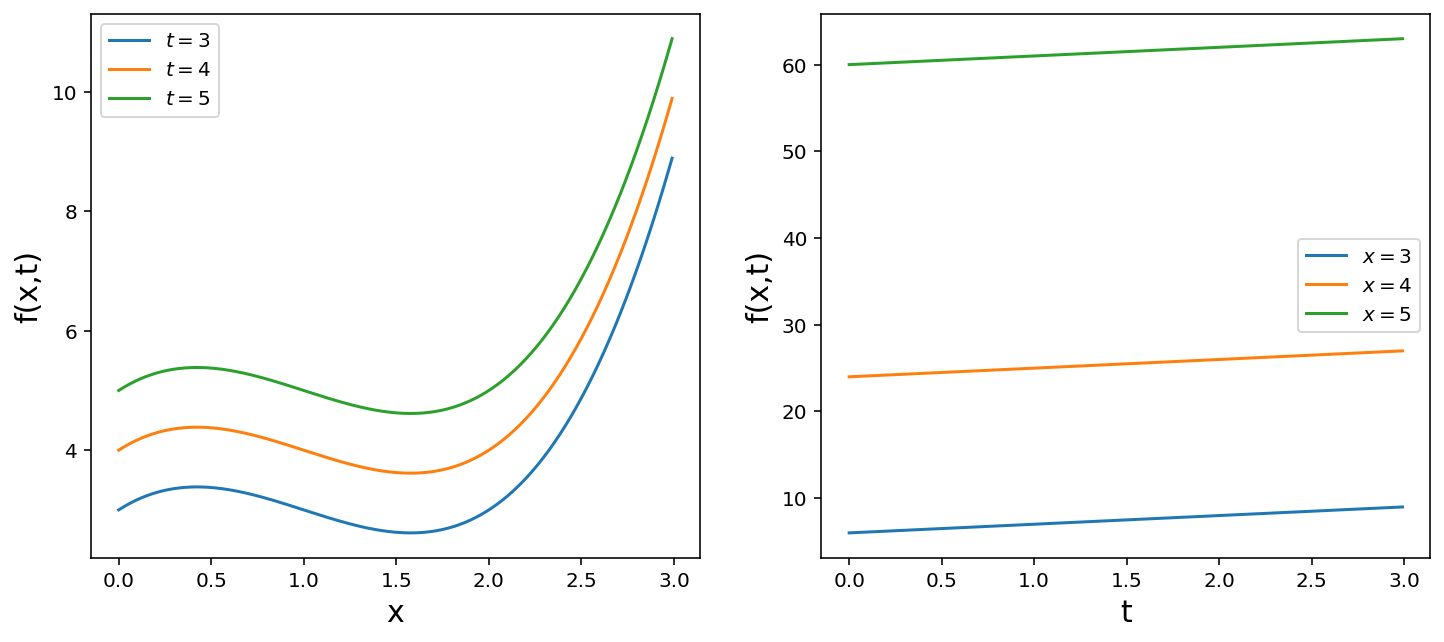

In [178]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12,5))
plot_f_of_fixed_t_x([3, 4, 5], ax=ax1)
plot_f_of_t_fixed_x([3, 4, 5], ax=ax2)
plt.show()

And we can also visualize it in 3 dimensions:

In [158]:
from numpy import exp, arange
from pylab import cm, contour, clabel, colorbar, axis, title, show
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
    
def contour_plot(ax=None):
    ax = ax or plt.gca()
    
    # Create grid of points
    x = arange(0,3.0,0.1)
    y = arange(0,3.0,0.1)
    X,Y = np.meshgrid(x, y) 

    # Evaluation of the function on the grid
    f_output = f_of_t_x(X, Y) 

    # Drawing the function
    im = ax.imshow(f_output, cmap=cm.RdBu) 

    # Adding the Contour lines with labels
    cset = ax.contour(f_output, arange(0,3,0.2), linewidths=2, cmap=cm.Set2)
    ax.clabel(cset,inline=True,fmt='%1.1f',fontsize=10)

    # Adding colobar & title
    ax.set_title('$f(t, x) = t + x^3 - 3x^2 + 2x$')
    ax.set_xlabel('t')
    ax.set_ylabel('x')

    return ax

def three_dimensional_plot(ax=None):
    ax = ax or plt.gca(projection='3d')

    surf = ax.plot_surface(
        X, Y, f_output, rstride=1, cstride=1, 
        cmap=cm.RdBu,linewidth=0, antialiased=False
    )

    ax.zaxis.set_major_locator(LinearLocator(10))
    ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))
    ax.set_xlabel('t')
    ax.set_ylabel('x')
    ax.set_zlabel('f(t,x)')

    fig.colorbar(surf, shrink=0.5, aspect=5)

    return ax

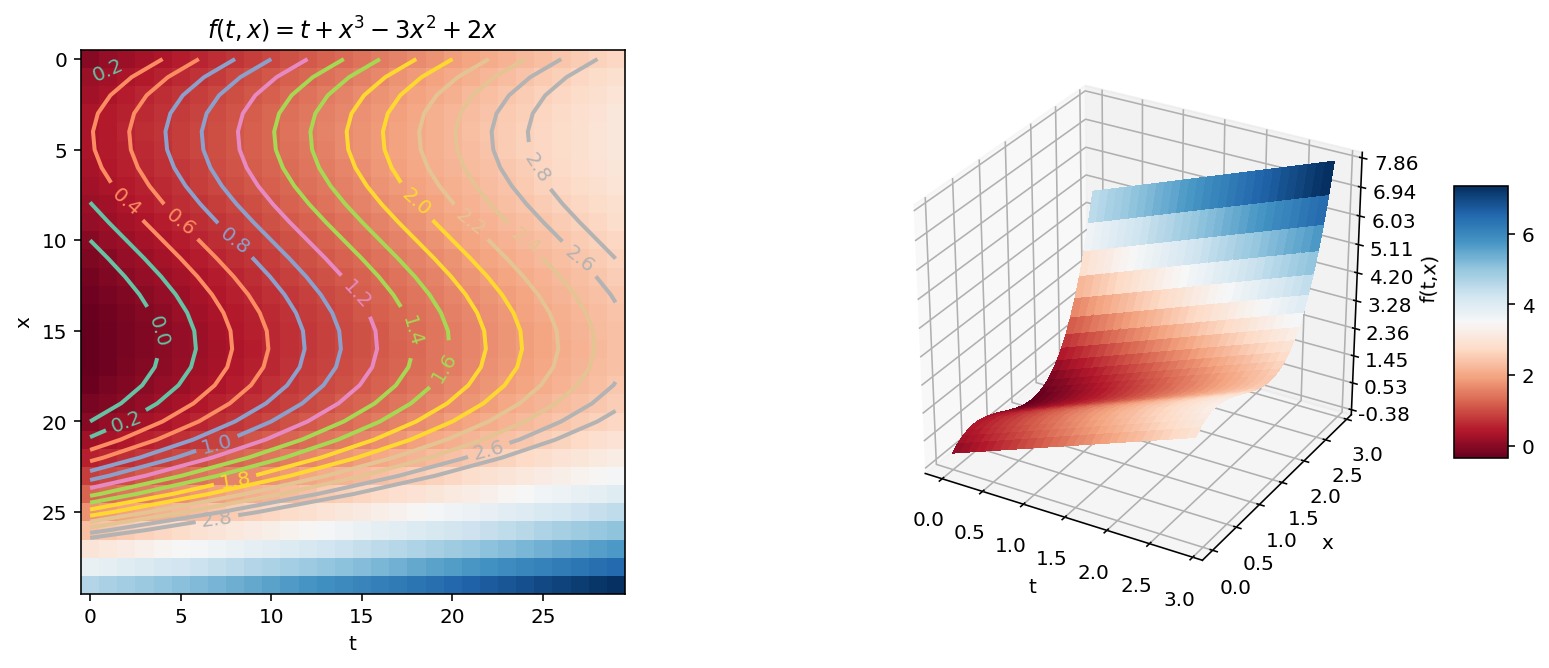

In [157]:
fig = plt.figure(figsize=(14,5))
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2, projection='3d')

contour_plot(ax1)
three_dimensional_plot(ax2)

The reason for taking the time to create these visualizations is that it is crucial in understanding what our integral and derivative operations are doing. Let us start with considering the integration portion:

$$\int_a^b f(t, x) dx$$

Here we are looking at the integral with respect to $x$. Because $f$ is both a function of $x$ and $t$, we must realize that during this integration process we are essentially treating $t$ as a constant and simply finding the area under the curve for _fixed values_ of $t$. In other words, we are in the situation below:

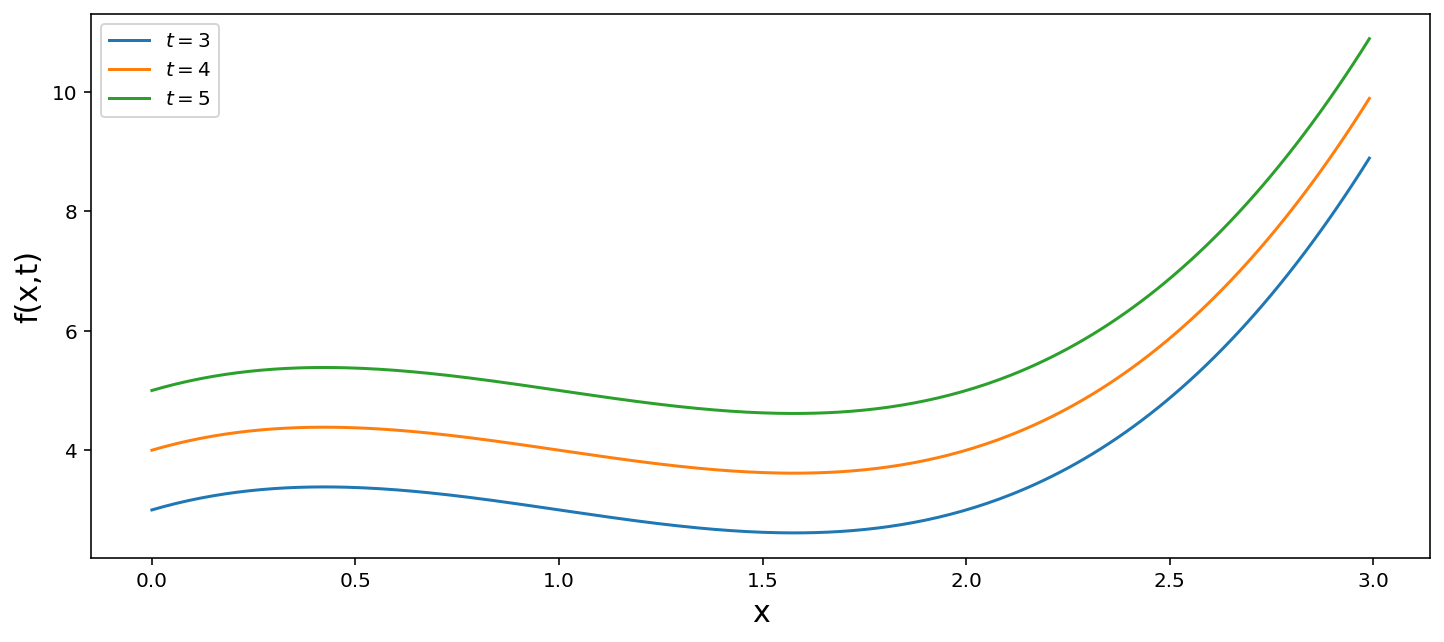

In [162]:
fig, (ax1) = plt.subplots(nrows=1, ncols=1, figsize=(12,5))
plot_f_of_fixed_t_x([3, 4, 5], ax1)

Where for fixed $t$'s we find the area under the curve from $x=a$ to $x=b$. Now, once we have found these areas, we then want to see how those areas change _as we change $t$_! Above, we should have a relatively good idea that as we increase $t$ the area under the curve will change (i.e. the area under the curve at $t = 5$ is greater than that at $t=3$). 

With this orientation complete we can get back to our derivation. We can start by thinking about what happens as we just ever so slightly increase $t$ by a value $\Delta t$:

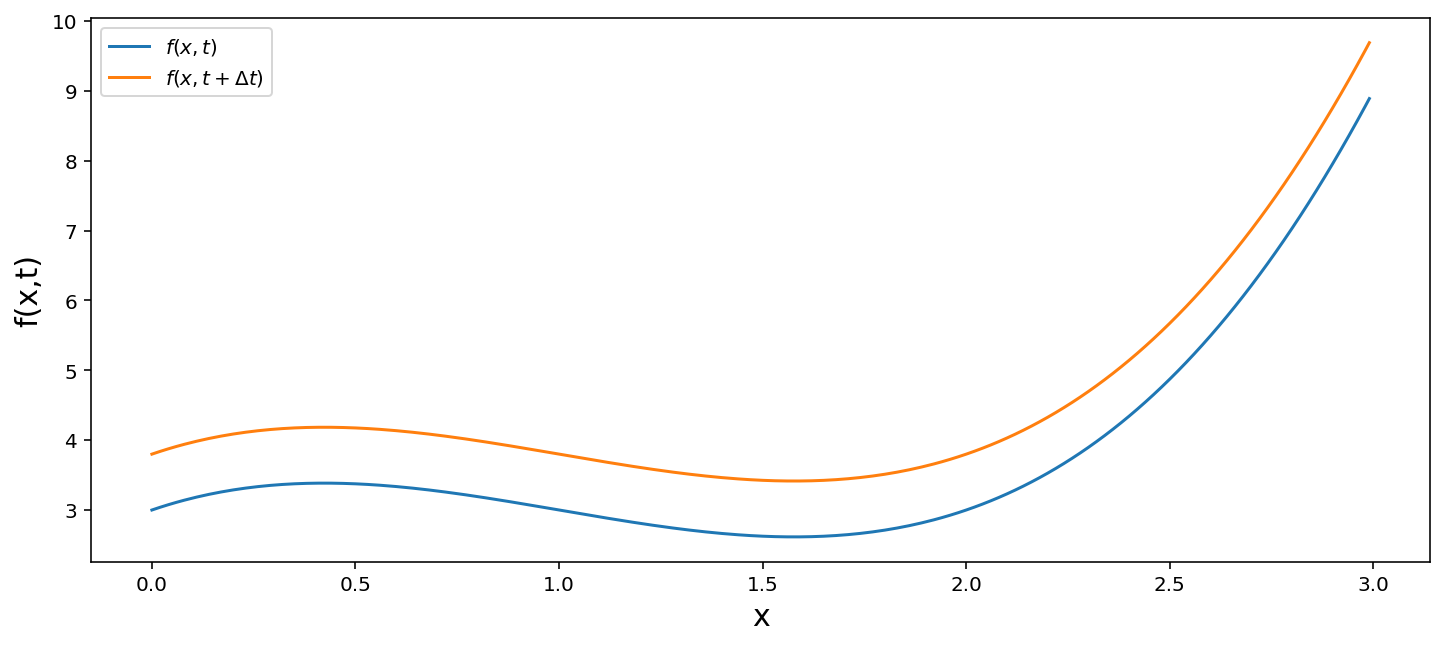

In [182]:
fig, (ax1) = plt.subplots(nrows=1, ncols=1, figsize=(12,5))
plot_f_of_fixed_t_x([3, 3.8], custom_legend=[f'$f(x, t)$', f'$f(x, t + \Delta t)$'], ax=ax1)

# References
* Plotting:
    * https://glowingpython.blogspot.com/2012/01/how-to-plot-two-variable-functions-with.html
* Derivation:
    * https://www.youtube.com/watch?v=zbWihK9ibhc